In [1]:
import time
import os
import re
import datetime
import glob

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [65]:
division = 'v3_m'
paths = glob.glob('database/{}/teamdb_*'.format(division))
print(paths)

['database/v3_m\\teamdb_2017-18_regular.csv', 'database/v3_m\\teamdb_2018-19_regular.csv', 'database/v3_m\\teamdb_2019-20_regular.csv', 'database/v3_m\\teamdb_2020-21_regular.csv', 'database/v3_m\\teamdb_2021-22_regular.csv']


In [66]:
df4 = pd.DataFrame(index=df3.columns)
for path in paths:
    # print(path[-14:-12])
    year = path[-14:-12]
    df = pd.read_csv(path)
    f = lambda x: 1 if x == 'Win' else 0
    df['Win'] = df['Win_Lose'].map(f)
    df2 = df[['AA', 'AP', 'AE', 'ASucc%', 'AP/S', 'BAA', 'BAP', 'BAE', 'BASucc%',
              'BP', 'BP/S', 'SVA', 'SVP', 'SVE', 'SVx', 'SVEff%', 'RA', 'Rx', 'Rg',
              'RSucc%']].copy()
    # df2['BASucc%'].replace('-', np.nan, inplace=True)
    # df2['BASucc%'] = df2['BASucc%'].apply(lambda x: np.nan if x == '-' else x).astype(float)
    df2['BASucc%'] = df2['BASucc%'].apply(lambda x: 0 if x == '-' else x).astype(float)
    # df2['BASucc%'] =df2['BASucc%'].astype(float)
    df3 = df2.apply(lambda x: (x-x.mean())/x.std(), axis=0)
    X = df3 # 説明変数
    Y = df['Win']
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0) # 80%のデータを学習データに、20%を検証データにする

    lr = LogisticRegression() # ロジスティック回帰モデルのインスタンスを作成
    lr_ = lr.fit(X_train, Y_train) # ロジスティック回帰モデルの重みを学習
    Y_pred = lr.predict(X_test)
    count = 0
    for i,j in zip(Y_pred, Y_test):
        if i == j:
            count += 1
    print(year, count/len(Y_pred))
    df4[year] = lr.coef_[0]    
df4

18 0.8888888888888888
19 0.9583333333333334
20 0.75
21 1.0
22 0.9090909090909091


,18,19,20,21,22
AA,0.371799,0.076115,0.234186,0.012037,0.169821
AP,0.532288,0.461967,0.646639,0.119333,0.222329
AE,-0.196249,-0.901074,0.173794,-1.039645,-0.702915
ASucc%,0.448300,0.713534,0.974957,0.313241,0.429055
AP/S,0.734086,0.705738,0.067871,0.549823,0.428390
BAA,-0.161597,-0.525982,-0.108658,-0.115928,0.103189
BAP,0.298087,0.071206,-0.053420,0.109507,0.199161
BAE,0.147248,0.653057,0.214319,0.427834,0.465051
BASucc%,0.477260,0.134042,0.501700,0.475248,0.278416
BP,0.627653,0.766543,0.410418,0.389412,0.595467


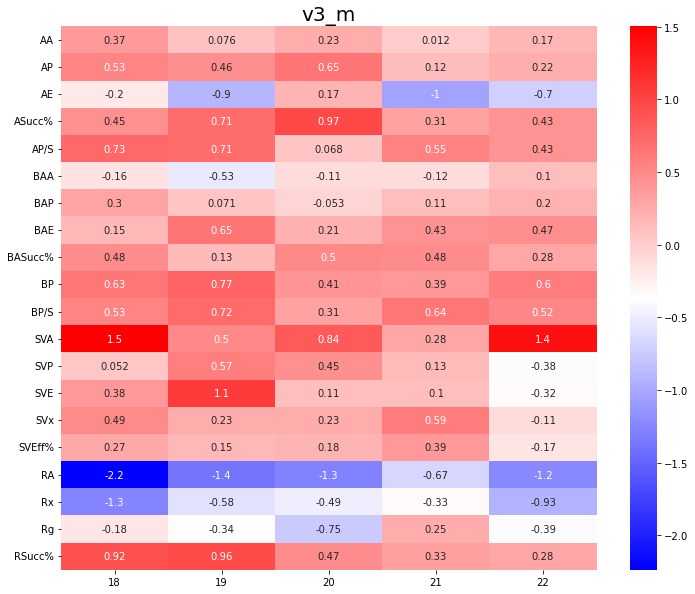

In [67]:
fig = plt.figure(figsize=(12,10))
plt.title(division, fontsize=20)
sns.heatmap(df4,annot=True,cmap='bwr')
plt.savefig('graph/std_heatmap_{}.png'.format(division),facecolor='white')
plt.show()